**Dataset Information**

The dataset contain 3 classes of 50 instanxes each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly seperable from the other each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal lenght in cm
4. petal width in cm
5. class: - Iris Setosa -- Iris Versicolour -- Iris Virginica

import modules

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Corrected import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Mount the drive

In [108]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA

1.	Data Loading and Initial Inspection

In [109]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


2.	Descriptive Statistics

In [111]:
#description using groupby
df.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

3.	Histograms

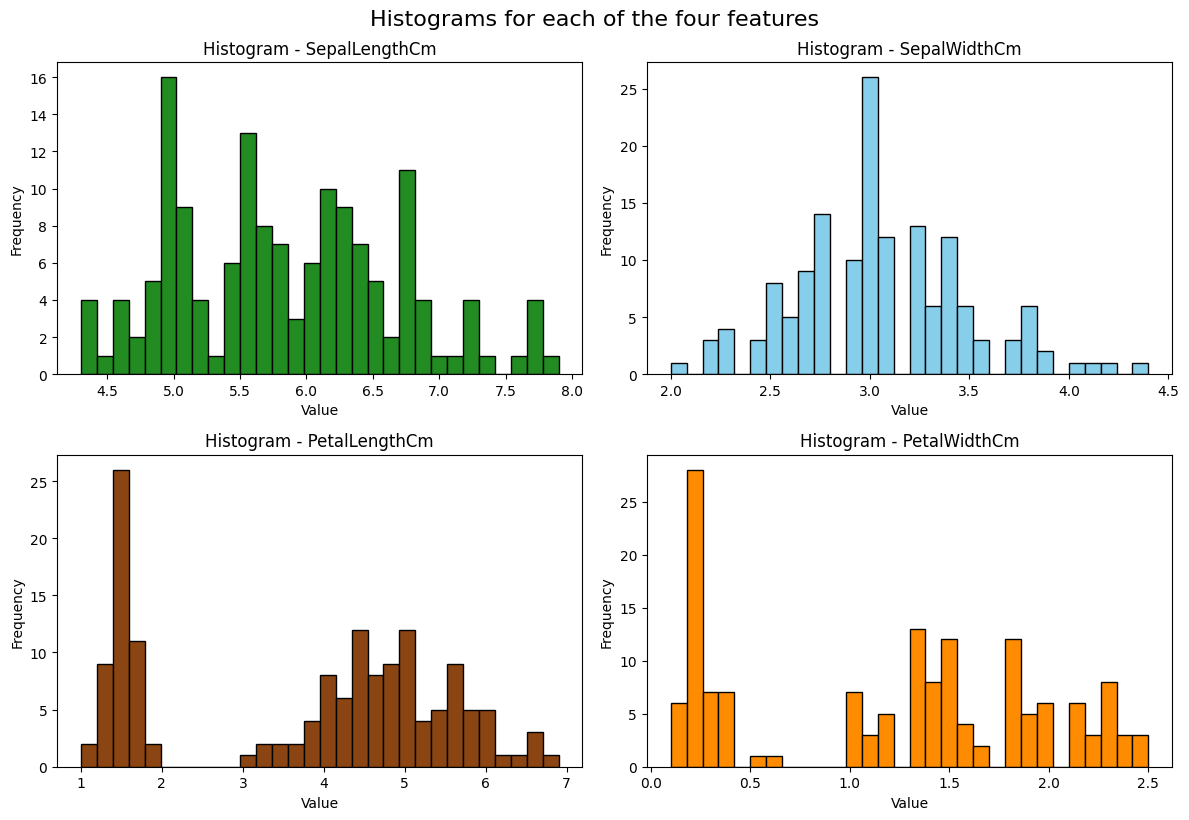

In [112]:
#scatterplot between features
colors = ['#228B22', '#87CEEB', '#8B4513', '#FF8C00']
labels = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
datasets = [df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'], df['PetalWidthCm']]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].hist(datasets[i], bins=30, color=colors[i], edgecolor='black')
    axs[i].set_title(f'Histogram - {labels[i]}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms for each of the four features', fontsize=16, y=1.02)
plt.show()

4.	Scatter Plots

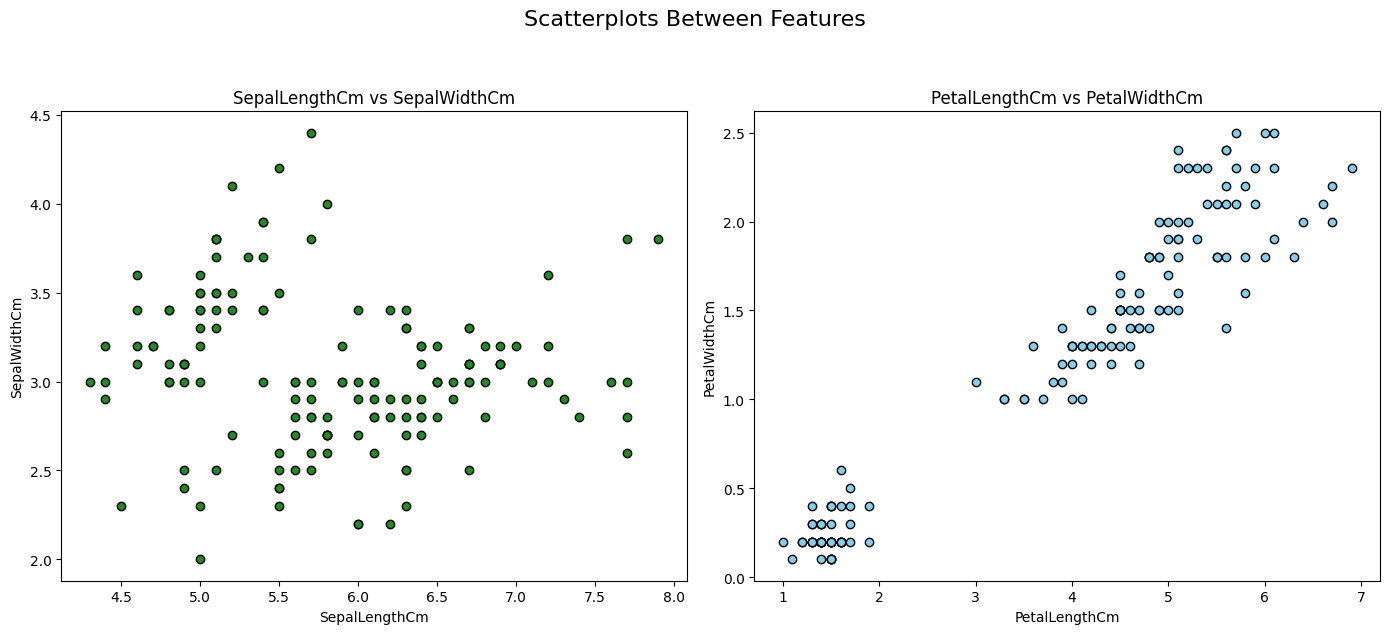

In [113]:
import matplotlib.pyplot as plt

# Define colors, labels, and datasets
colors = ['#228B22', '#87CEEB']
labels = ['SepalLengthCm vs SepalWidthCm', 'PetalLengthCm vs PetalWidthCm']
datasets = [[df['SepalLengthCm'], df['SepalWidthCm']], [df['PetalLengthCm'], df['PetalWidthCm']]]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

for i in range(2):
    x, y = datasets[i]
    axs[i].scatter(x, y, color=colors[i], edgecolor='black')
    axs[i].set_title(labels[i])
    axs[i].set_xlabel(x.name)
    axs[i].set_ylabel(y.name)

plt.suptitle('Scatterplots Between Features', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


5.	Box Plots

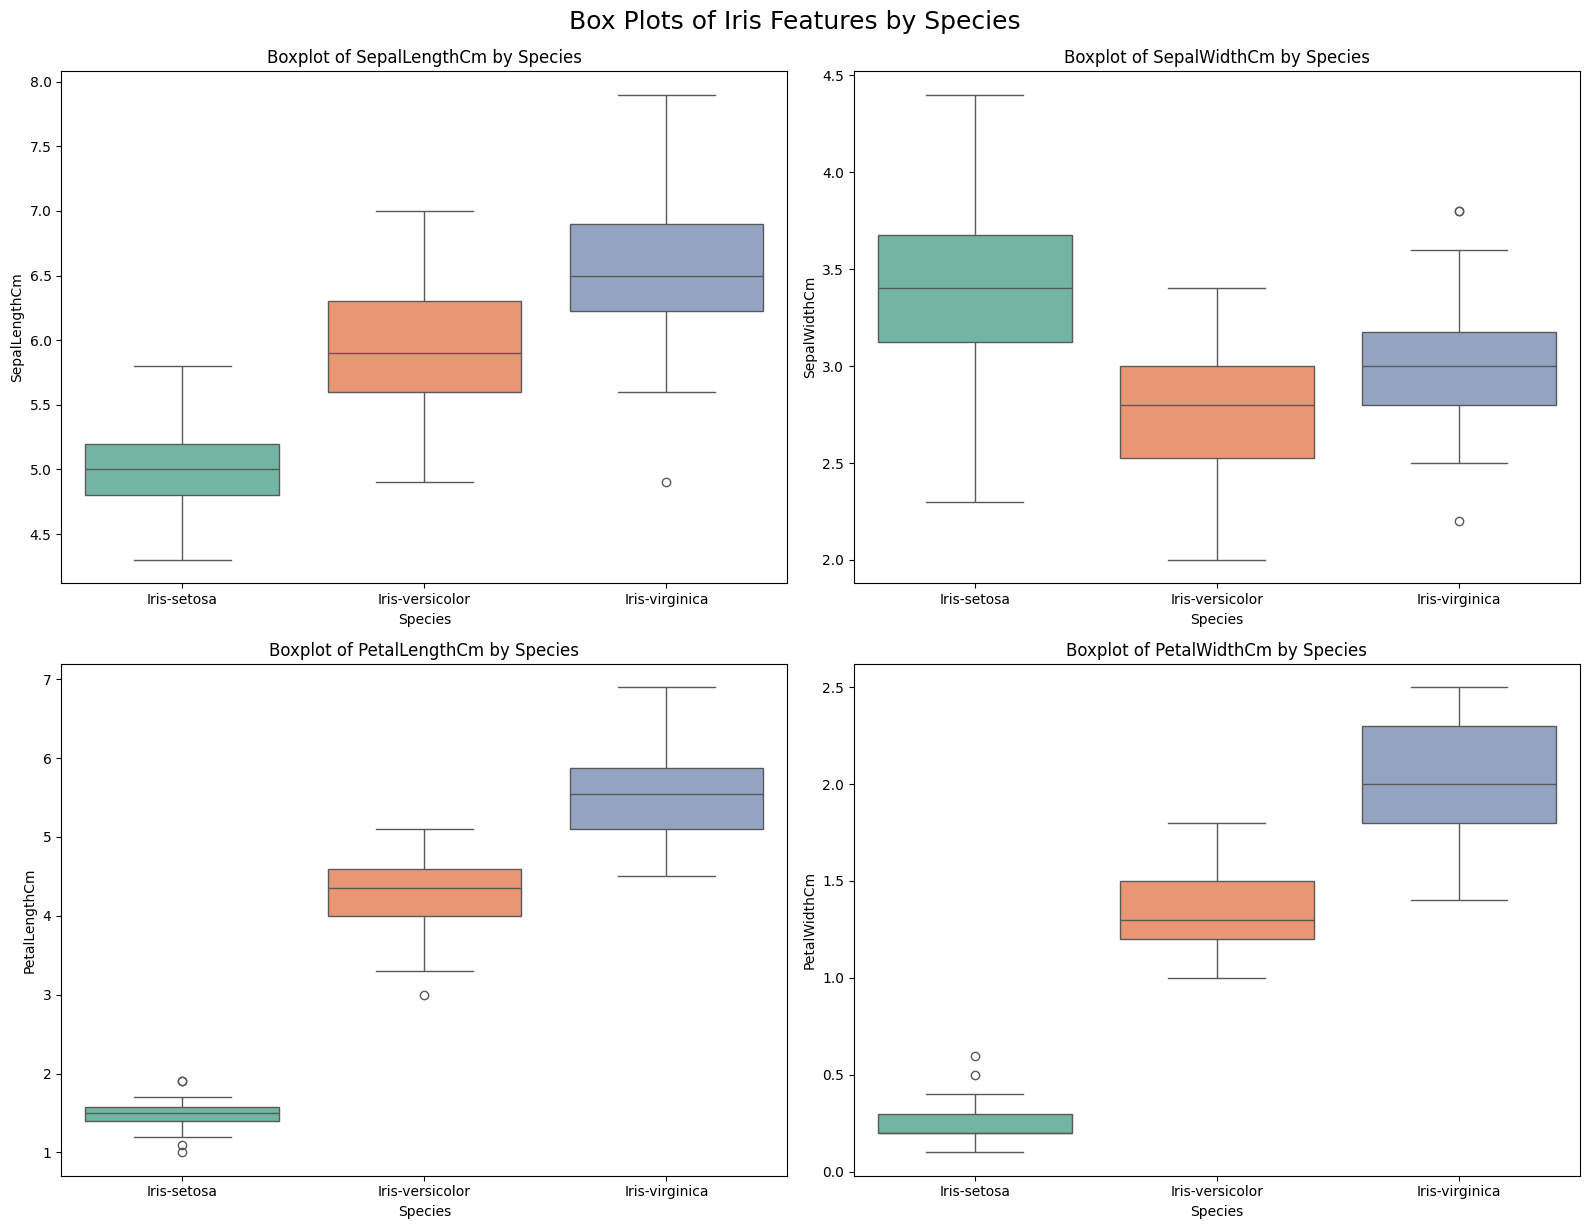

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Set up the plot grid
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle('Box Plots of Iris Features by Species', fontsize=18, y=1.02)
plt.show()


6.	Hypothesis Testing (Related to Iris Features):

Hypothesis 1:
“The mean sepal length is significantly different between the Setosa and Versicolor species.”

Null hypothesis (H₀):

There is no significant difference in mean sepal length between Setosa and Versicolor.

𝜇
Setosa
=
𝜇
Versicolor



Alternative hypothesis (H₁):

There is a significant difference.
𝜇
Setosa
≠
𝜇
Versicolor
μ



In [115]:
from scipy.stats import ttest_ind

# Extract sepal lengths for each species
setosa_sepal = df[df['Species'] == 'Iris-setosa']['SepalLengthCm']
versicolor_sepal = df[df['Species'] == 'Iris-versicolor']['SepalLengthCm']

# Perform independent t-test
t_stat, p_value = ttest_ind(setosa_sepal, versicolor_sepal, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sepal length.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sepal length.")


T-statistic: -10.5210
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sepal length.


Hypothesis 2

“The mean petal width is significantly different across all three Iris species.”

Null hypothesis (H₀):

All three Iris species have equal mean petal width.

Alternative hypothesis (H₁):

At least one species has a mean petal width that is significantly different from the others.

In [116]:
from scipy.stats import f_oneway

# Extract petal width data for each species
setosa_petal_width = df[df['Species'] == 'Iris-setosa']['PetalWidthCm']
versicolor_petal_width = df[df['Species'] == 'Iris-versicolor']['PetalWidthCm']
virginica_petal_width = df[df['Species'] == 'Iris-virginica']['PetalWidthCm']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one species has a significantly different mean petal width.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean petal width across species.")


F-statistic: 959.3244
P-value: 0.0000
Reject the null hypothesis: At least one species has a significantly different mean petal width.


Model Building, Prediction, and Evaluation


1.	Data Preparation

In [117]:
# preparing the target columns whict=h is y and the feature column which is x
y = df['Species']
X = df.drop(['Species','Id'], axis=1)


In [118]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [119]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


2.	Model Selection and Training

Logistic Regression

In [120]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [121]:
#predict the y_pred_log
y_pred_log = logistic_model.predict(X_test)

#performance scores
print(f" accuracy_score is {accuracy_score(y_test, y_pred_log)}")
print("confusion matrix is")
print(f" {confusion_matrix(y_test, y_pred_log)}")

 accuracy_score is 1.0
confusion matrix is
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


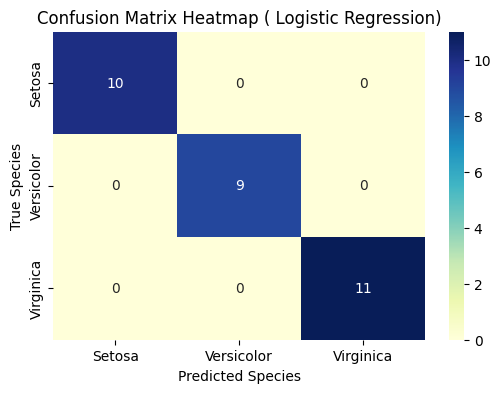

In [122]:
#ploting the confusion matrix using heatmap
plt.figure(figsize=(6, 4))
species = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=species, yticklabels=species)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix Heatmap ( Logistic Regression)')
plt.show()

K-Nearest Neighbors (KNN)

In [123]:
#training the k-nearest neighbor model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
#predict the y_pred_knn
y_pred_knn = knn.predict(X_test)

#performance scores
print(f" accuracy_score is {accuracy_score(y_test, y_pred_knn)}")
print("confusion matrix is")
print(f" {confusion_matrix(y_test, y_pred_knn)}")

 accuracy_score is 1.0
confusion matrix is
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


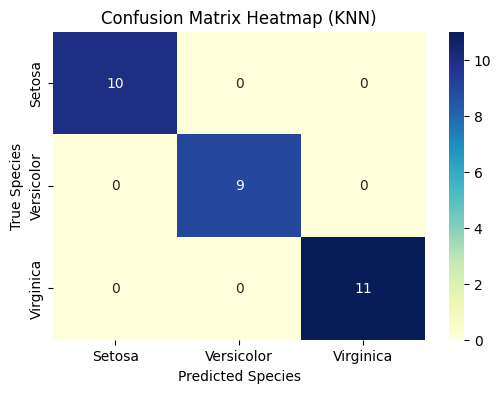

In [125]:
#ploting the confusion matrix using heatmap
plt.figure(figsize=(6, 4))
species = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=species, yticklabels=species)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix Heatmap (KNN)')
plt.show()

Decision Forest

In [126]:
#training the DecisionTreeClassifier
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
#predict the y_pred_dt
y_pred_dt = decision_model.predict(X_test)

#performance scores
print(f" accuracy_score is {accuracy_score(y_test, y_pred_dt)}")
print("confusion matrix is")
print(f"{confusion_matrix(y_test, y_pred_dt)}")

 accuracy_score is 1.0
confusion matrix is
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


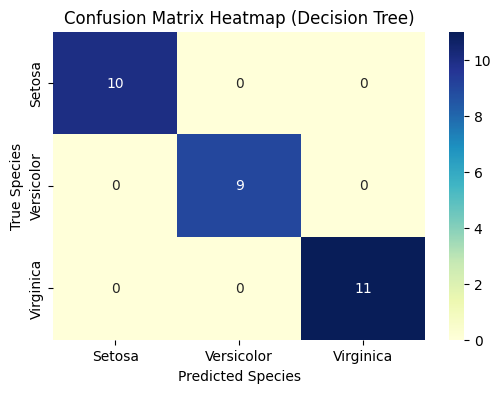

In [128]:
#ploting the confusion matrix using heatmap
plt.figure(figsize=(6, 4))
species = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=species, yticklabels=species)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.show()